# INFO 370 Problem Set 6: Linear Regression
*Name:* Israel Martinez

## 1 When will we see BOE? (45pt)
“Blue Ocean Event” (BOE) is a colloqial name for the event where there is no sea ice in the northern hemisphere. If the current trends continue, we are expected to see the first BOE around 2050 or so. Your task is to predict when will the sea ice extent go to zero. We will be looking at two months: September and March. Northern sea ice reaches its yearly minimum in September and maximum in March.

The dataset north-sea-ice-extent can be downloaded from NSDIC webpage but I recommend to get the version on canvas (the website has the data split into several files). The data is based on satellite imagery (but not necessarily in visible light). The main variables are

year - 1978-2021

mo - month, 1-12

data-type - data source (satellite)

region - “N” for northern hemisphere

extent - in M km2. Extent is the sea where ice concentration is at least 15%.

area - in M km2. Area is considered a less reliable figure than extent because of measurement issues—satellites have hard time distinguishing between open water, and water on ice.

Your tasks are the following:

1. (5pt) Load the data. Remove all missing extents–we will only work with extent data here.

    Note: make sure you understand how missings are coded!

In [18]:
# 2:30
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [19]:
ice = pd.read_csv("./data/north-ice-extent.csv.bz2", sep="\t")
ice

,year,mo,data-type,region,extent,area
0,1978,11,Goddard,N,11.65,9.04
1,1978,12,Goddard,N,13.67,10.90
2,1979,1,Goddard,N,15.41,12.41
3,1979,2,Goddard,N,16.18,13.18
4,1979,3,Goddard,N,16.34,13.21
...,...,...,...,...,...,...
507,2021,2,NRTSI-G,N,14.39,12.71
508,2021,3,NRTSI-G,N,14.64,12.91
509,2021,4,NRTSI-G,N,13.84,12.13
510,2021,5,NRTSI-G,N,12.66,10.82


In [20]:
ice.isna().sum()

year         0
mo           0
data-type    0
region       0
extent       0
area         0
dtype: int64

It shows that there is no missing data in the extent column. So I assume that I can move on.

2. (6pt) Make a plot where you show the September and March ice extent over years. (This also serves as a test regarding the missings.)

In [21]:
ice2 = ice[(ice.mo == 3) | (ice.mo == 9)]
ice2

,year,mo,data-type,region,extent,area
4,1979,3,Goddard,N,16.34,13.21
10,1979,9,Goddard,N,7.05,4.58
16,1980,3,Goddard,N,16.04,12.99
22,1980,9,Goddard,N,7.67,4.87
28,1981,3,Goddard,N,15.63,12.71
...,...,...,...,...,...,...
484,2019,3,Goddard,N,14.57,12.89
490,2019,9,Goddard,N,4.36,3.17
496,2020,3,Goddard,N,14.73,13.03
502,2020,9,Goddard,N,4.00,2.83


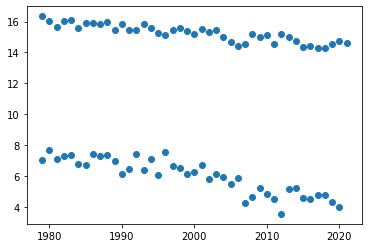

In [22]:
_ = plt.scatter(ice2.year, ice2.extent)

I first modified the dataframe to only include the months March and September. After making the graph, I can see that the top scatter plots are from March and the bottom ones are from September. Both show a downward trend over the years and the gap between them gets larger.

3. (6pt) Estimate a linear regression model for September data where you describe the sea ice extent as a function of years.

    Note: in terms of interpeting the coefficients below, I recommend to use years relative to 2000, i.e. 1999 = −1, 2000 = 0, 2001 = 1 etc.

In [32]:
import statsmodels.formula.api as smf
ice3 = ice[(ice.mo == 9)]

In [31]:
m = smf.ols("extent ~ year", data=ice3).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 extent   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     157.1
Date:                Wed, 04 Aug 2021   Prob (F-statistic):           1.95e-15
Time:                        22:11:03   Log-Likelihood:                -31.330
No. Observations:                  42   AIC:                             66.66
Df Residuals:                      40   BIC:                             70.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    172.8293     13.307     12.988      0.000     145.934     199.724
year          -0.0834      0.007    -12.536      0.000      -0.097      -0.070
==============================================================================
Omnibus:                        2.233   Durbin-Watson:                   1.705
Prob(Omnibus):                  0.327   Jarque-Bera (JB):                1.227
Skew:                          -0.284   Prob(JB):                        0.541
Kurtosis:                       3.616   Cond. No.                     3.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

4. (6pt) Interpret the coefficients. What does intercept mean? How big is yearly effect? Is it statistically significant?

The coefficient for year is -0.0834. The intercept is 172.8293 which is the constant parameter and it indicates the predicted value where x is equal to 0. It looks statistically insignificant because -0.08 is close to 0.

5. (6pt) Create a plot (like what you did with Boston housing) where you show the regression line through the September data points.

    Comment the plot. Do you see a trend? Do you see any  acceleration/deceleration (i.e. the trend is getting faster/slower)?

    Note: you may consider seaborn library in addition to matplotlib if you want ready-made functionality for regression lines. But you can also do it in a way we did it in class using plt.plot.

In [33]:
import seaborn as sns

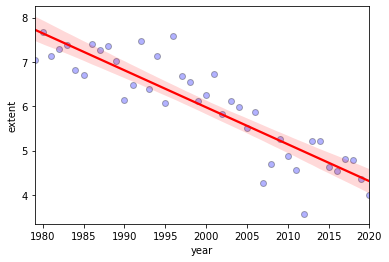

In [36]:
_ = sns.regplot(x = "year", y = "extent", 
            scatter_kws = {"color":"blue", "alpha":0.3, 
                           "edgecolor":"black"},
            line_kws={"color":"red"}, 
            data=ice3)

I see a downward trend in the regression plot. It looks like there is a faster deceleration because the extent goes more downward in each decade. Each decade seems to decrease in extent by one.

6. (8pt) Based on your linear prediction: when will your trend line hit 0 and we will have BOE?

    Note: such predictions are highly speculative as we ignore the physical reality of the polar regions.

    Note 2: your figure tells when will the trend reach zero. The first BOE will probably happen 10-20 years earlier as the yearly extent jumps up and down around the trend.

As the value of extent goes down by 1 about each decade, I would assume the trend will reach 0 around 2060 or before 2070. In the four decades observed above, the starting point is below 8 and the last point is just above 4, so that's why I don't assume that it will reach 0 by 2050 based on my model.

7. (8pt) Repeat these calculations for March—the month of the yearly maximum. When will the Arctic be completely ice free (if the current trends continue)?

In [40]:
ice4 = ice[(ice.mo == 3)]
m = smf.ols("extent ~ year", data=ice4).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 extent   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     160.8
Date:                Wed, 04 Aug 2021   Prob (F-statistic):           8.96e-16
Time:                        22:55:19   Log-Likelihood:                -1.3365
No. Observations:                  43   AIC:                             6.673
Df Residuals:                      41   BIC:                             10.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     94.9157      6.283     15.107      0.000      82.227     107.604
year          -0.0398      0.003    -12.679      0.000      -0.046      -0.033
==============================================================================
Omnibus:                        3.903   Durbin-Watson:                   1.534
Prob(Omnibus):                  0.142   Jarque-Bera (JB):                2.534
Skew:                          -0.403   Prob(JB):                        0.282
Kurtosis:                       2.125   Cond. No.                     3.22e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

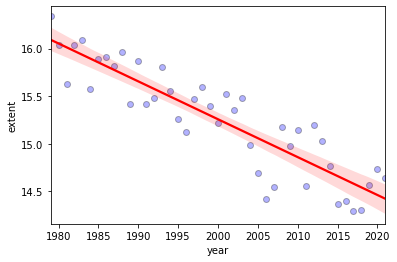

In [39]:
_ = sns.regplot(x = "year", y = "extent", 
            scatter_kws = {"color":"blue", "alpha":0.3, 
                           "edgecolor":"black"},
            line_kws={"color":"red"}, 
            data=ice4)

For the month of March, it looks like it will approach 0 a lot later than the September data. The decceleration is slower because March is the coldest month. If the current trends continue as it shows in this graph, the arctic will be completely ice free well in the next decade because it shows it decreased by 1.5 in 40 years. However, I don't think I did this correctly because that does not sound accurate and it's predicted to be 0 much sooner than that.

## 2 How Is Basketball Game Score Calculated? (45pt)
In this section you will work with basketball data. Basketball is a big business, and there is a lot of analytics collected about high-profile games. Game score is one of the popular measures of player’s performance in game. But how is it calculated?

Here we look at one particular dataset about James Harden’s (see photo) 2018-2019 season. We recommend you to be familiarize yourself with the basics of basketball, including what are field goals, turnovers, and personal fouls (wikipedia is a good source).

The dataset contains 30 variables, including field goals, field goal attempts, 3-point field goals, rebounds and personal fouls. See the included readme file for more information.

The central variable in current context is GmSc, the game score. It is a summary performance score for the player (given he played in the game).

Here are the tasks:

1. (2pt) Load the data (harden-18-19.csv). Do basic sanity checks.

In [50]:
harden = pd.read_csv("./data/harden-18-19.csv.bz2", sep=",")
harden

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,2018-10-17,29-052,HOU,NaN,NOP,L (-19),1,34:43,...,7,9,10,3,1,4,2,18,18.9,-23
1,2,2.0,2018-10-20,29-055,HOU,@,LAL,W (+9),1,37:50,...,6,7,5,2,1,6,2,36,27.0,-3
2,3,3.0,2018-10-21,29-056,HOU,@,LAC,L (-3),1,39:45,...,4,4,14,2,0,3,1,31,26.4,+5
3,4,4.0,2018-10-24,29-059,HOU,NaN,UTA,L (-11),1,31:38,...,4,5,7,1,0,7,4,29,17.7,-5
4,5,NaN,2018-10-26,29-061,HOU,NaN,LAC,L (-20),Inactive,Inactive,...,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,74.0,2019-04-02,29-219,HOU,@,SAC,W (+25),1,29:28,...,3,3,10,1,0,2,2,36,33.2,+29
78,79,75.0,2019-04-03,29-220,HOU,@,LAC,W (+32),1,30:21,...,6,7,7,0,0,6,3,31,23.5,+16
79,80,76.0,2019-04-05,29-222,HOU,NaN,NYK,W (+24),1,29:12,...,8,9,8,1,1,3,2,26,21.1,+29
80,81,77.0,2019-04-07,29-224,HOU,NaN,PHO,W (+36),1,29:00,...,13,13,9,2,0,6,3,30,28.4,+39


In [43]:
list(harden.columns)

['Rk',
 'G',
 'Date',
 'Age',
 'Tm',
 'Unnamed: 5',
 'Opp',
 'Unnamed: 7',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'GmSc',
 '+/-']

In [48]:
harden.isna().sum()

Rk             0
G              4
Date           0
Age            0
Tm             0
Unnamed: 5    41
Opp            0
Unnamed: 7     0
GS             0
MP             0
FG             0
FGA            0
FG%            0
3P             0
3PA            0
3P%            0
FT             0
FTA            0
FT%            1
ORB            0
DRB            0
TRB            0
AST            0
STL            0
BLK            0
TOV            0
PF             0
PTS            0
GmSc           0
+/-            0
dtype: int64

Only "Unnamed: 5" and "FT%" have NaN values in their columns.

2. (2pt) How many games did James Harden play in the 2018-2019 season?

    Note: the data also includes games where he did not play.

In [55]:
harden.dtypes

Rk              int64
G             float64
Date           object
Age            object
Tm             object
Unnamed: 5     object
Opp            object
Unnamed: 7     object
GS             object
MP             object
FG             object
FGA            object
FG%            object
3P             object
3PA            object
3P%            object
FT             object
FTA            object
FT%            object
ORB            object
DRB            object
TRB            object
AST            object
STL            object
BLK            object
TOV            object
PF             object
PTS            object
GmSc           object
+/-            object
dtype: object

In [83]:
harden2 = harden[harden.MP != 'Inactive']
harden2

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,2018-10-17,29-052,HOU,NaN,NOP,L (-19),1,34:43,...,7,9,10,3,1,4,2,18,18.9,-23
1,2,2.0,2018-10-20,29-055,HOU,@,LAL,W (+9),1,37:50,...,6,7,5,2,1,6,2,36,27.0,-3
2,3,3.0,2018-10-21,29-056,HOU,@,LAC,L (-3),1,39:45,...,4,4,14,2,0,3,1,31,26.4,+5
3,4,4.0,2018-10-24,29-059,HOU,NaN,UTA,L (-11),1,31:38,...,4,5,7,1,0,7,4,29,17.7,-5
7,8,5.0,2018-11-03,29-069,HOU,@,CHI,W (+8),1,33:16,...,1,1,7,4,0,8,3,25,15.1,+9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,74.0,2019-04-02,29-219,HOU,@,SAC,W (+25),1,29:28,...,3,3,10,1,0,2,2,36,33.2,+29
78,79,75.0,2019-04-03,29-220,HOU,@,LAC,W (+32),1,30:21,...,6,7,7,0,0,6,3,31,23.5,+16
79,80,76.0,2019-04-05,29-222,HOU,NaN,NYK,W (+24),1,29:12,...,8,9,8,1,1,3,2,26,21.1,+29
80,81,77.0,2019-04-07,29-224,HOU,NaN,PHO,W (+36),1,29:00,...,13,13,9,2,0,6,3,30,28.4,+39


When taking out the rows where Harden is inactive, it shows he played 78 games.

3. (4pt) Clean the data and ensure the relevant variables are of numeric type so we can use those in the regression models. It is your task to find what is wrong with the data in its present form (it is downloaded directly from basketball-reference.com), and fix these issues.

Hint: a good way to transform text to number is pd.to_numeric

In [85]:
cols = ['FG', 'FGA', 'FG%', '3P', '3PA', 'FT', 'FTA', 'FT%', 'ORB', '3P%',
        'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc',
       '+/-']
harden2[cols] = harden2[cols].apply(pd.to_numeric, errors='coerce', axis=1)

/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [86]:
harden2.dtypes

Rk              int64
G             float64
Date           object
Age            object
Tm             object
Unnamed: 5     object
Opp            object
Unnamed: 7     object
GS             object
MP             object
FG            float64
FGA           float64
FG%           float64
3P            float64
3PA           float64
3P%           float64
FT            float64
FTA           float64
FT%           float64
ORB           float64
DRB           float64
TRB           float64
AST           float64
STL           float64
BLK           float64
TOV           float64
PF            float64
PTS           float64
GmSc          float64
+/-           float64
dtype: object

I used this post from [stack overflow](https://stackoverflow.com/questions/36814100/pandas-to-numeric-for-multiple-columns) to convert all relevant columns to a number. I'm not sure how to fix the red error message that I get even though it converts the columns I want into numeric types.

4. (5pt) Analyze the game score GmSc. What is its distribution? Which distribution does the histogram resemble? Range? Mean? Standard deviation?

In [87]:
harden2.GmSc.describe()

count    78.000000
mean     26.708974
std      10.053883
min       1.200000
25%      21.225000
50%      25.800000
75%      32.150000
max      52.200000
Name: GmSc, dtype: float64

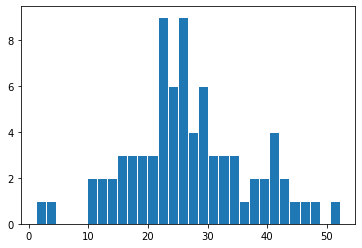

In [88]:
_ = plt.hist(harden2.GmSc, bins=30, edgecolor="white")

This looks like a normal distribution because of the bell curve in the middle. The range is 1.2-52.2, the mean is 26.708974, and the standard deviation is 10.053883.

5. (6pt) First, let’s run a simple regression model explaining game score GmSc by field goal attempts FGA:

    GmScg = β0 + β1 · FGAg + ϵg

    where g indexes games. (Call this Model 5).

    Display the results and answer the following questions:

    (a) What is the interpretation of Intercept (β0)?

    (b) What is the interpretation of FGA (β1)? Is it statistically significant?

In [90]:
m = smf.ols("GmSc ~ FGA", data=harden2).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     13.54
Date:                Thu, 05 Aug 2021   Prob (F-statistic):           0.000433
Time:                        00:25:16   Log-Likelihood:                -283.80
No. Observations:                  78   AIC:                             571.6
Df Residuals:                      76   BIC:                             576.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.5963      4.240      2.735      0.008       3.152      20.041
FGA            0.6175      0.168      3.680      0.000       0.283       0.952
==============================================================================
Omnibus:                        0.602   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.740   Jarque-Bera (JB):                0.739
Skew:                          -0.137   Prob(JB):                        0.691
Kurtosis:                       2.609   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='FGA', ylabel='GmSc'>

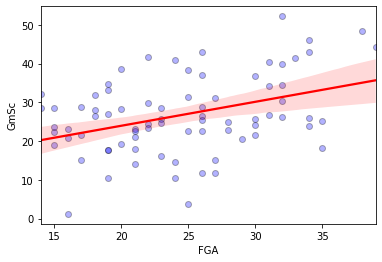

In [96]:
model5 = sns.regplot(x = "FGA", y = "GmSc", 
            scatter_kws = {"color":"blue", "alpha":0.3, 
                           "edgecolor":"black"},
            line_kws={"color":"red"}, 
            data=harden2)
model5

The interpretation of FGA doesn't look statistically significant because the p-value is 0.00, which is closer to 1 than it is to 0. I can see how this is true because the plots are scattered everywhere. However, I'm not sure that I did this correctly because I'm not sure where to use g index for games. Also, I didn't add any β0 or β1 because I'm still not sure where to get those values.

6. (8pt) Next, let’s analyse how is game score related to field goals (FG) and field goal attempts (FGA). Estimate the model 

    GmScg = β0 + β1 · FGg + β2 · FGAg + ϵg.
    
    (Call this Model 6).
    
    If done correctly, you should see results approximately 6.9, 3.4, -0.7.
    
    Answer the following questions:
    
    (a) What is the interpretation of FG? Is it statistically significant?
    
    (b) What is the interpretation of FGA (β2)? Is it statistically significant?
    
    (c) How do you explain the fact that model 5 shows positive and model 6 shows a negative estimate for FGA?
    
    (d) What is the R2 of the model? How does it compare to the model 5? What do you conclude from this comparison?

In [98]:
m = smf.ols("GmSc ~ FG + FGA", data=harden2).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     50.42
Date:                Thu, 05 Aug 2021   Prob (F-statistic):           1.33e-14
Time:                        00:51:53   Log-Likelihood:                -256.97
No. Observations:                  78   AIC:                             519.9
Df Residuals:                      75   BIC:                             527.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8608      3.075      2.231      0.029       0.735      12.987
FG             3.4082      0.396      8.616      0.000       2.620       4.196
FGA           -0.6940      0.194     -3.584      0.001      -1.080      -0.308
==============================================================================
Omnibus:                        2.958   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.228   Jarque-Bera (JB):                1.904
Skew:                           0.154   Prob(JB):                        0.386
Kurtosis:                       2.299   Cond. No.                         113.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='FG', ylabel='GmSc'>

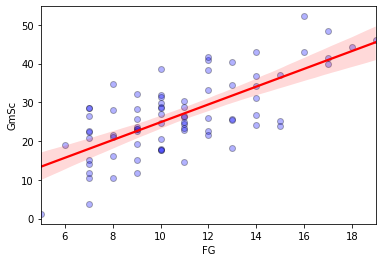

In [100]:
model6 = sns.regplot(x = "FG", y = "GmSc", 
            scatter_kws = {"color":"blue", "alpha":0.3, 
                           "edgecolor":"black"},
            line_kws={"color":"red"}, 
            data=harden2)
model6

(a) The interpretation of FG is 3.4082. The p-value is 0.00 so it is insignificant.

(b) The interpretation of FGA is -0.6940. The p-value is 0.001 so it is insignificant.

I'm not sure how to answer these questions because I don't know if I executed the steps correctly. I also don't know whether I'm supposed to focus on p-value or the coefficient aspects.

7. (5pt) Now let’s include personal fouls (PF) to the previous model 6. Estimate the new model and answer the following questions:

    (a) Interpret the effect of PF.

    (b) Does adding fouls change the estimates for FG and FGA in any major way?

    (c) What is R2 of the model? How does it compare to the model 6?

In [101]:
m = smf.ols("GmSc ~ FG + FGA + PF", data=harden2).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     36.24
Date:                Thu, 05 Aug 2021   Prob (F-statistic):           1.61e-14
Time:                        01:01:43   Log-Likelihood:                -254.94
No. Observations:                  78   AIC:                             517.9
Df Residuals:                      74   BIC:                             527.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.9447      3.393      2.931      0.004       3.184      16.705
FG             3.3884      0.388      8.730      0.000       2.615       4.162
FGA           -0.6621      0.191     -3.473      0.001      -1.042      -0.282
PF            -1.1670      0.588     -1.986      0.051      -2.338       0.004
==============================================================================
Omnibus:                        2.480   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.289   Jarque-Bera (JB):                1.936
Skew:                           0.230   Prob(JB):                        0.380
Kurtosis:                       2.380   Cond. No.                         128.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(a) PF coefficient is a negative number.

(b) Adding PF seemed to decrease the coefficients of FG and FGA.

(c) I was thinking of using the mse() function used in class week 6 on Tuesday, but I don't know what b0 and b1 values are.

8. (8pt) Now include all the independent numerical variables, i.e. FG, FGA, 3P, 3PA, FT, FTA, ORB, DRB, AST, STL, BLK, TOV, PF into the model. Estimate it, and discuss the results.

    Answer the following questions:
    
    (a) How do standard errors and t-values look like in this model?
    
    (b) What is R 2 of this model? What does it tell you about how game score is calculated?
    
    (c) What do the results tell about turnover (TOV )? Is it good or bad for the team?

    Suggestion: check out patsy Q() quoting to include non-valid variable names.

In [111]:
m = smf.ols("GmSc ~ FG + FGA + Q('3P') + Q('3PA') + FT + FTA + ORB +\
            DRB + AST + STL + BLK + TOV + PF", data=harden2).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.034e+28
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        01:35:45   Log-Likelihood:                 2238.1
No. Observations:                  78   AIC:                            -4448.
Df Residuals:                      64   BIC:                            -4415.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.776e-14   6.54e-14      0.272      0.787   -1.13e-13    1.48e-13
FG             2.4000   7.92e-15   3.03e+14      0.000       2.400       2.400
FGA           -0.7000   4.58e-15  -1.53e+14      0.000      -0.700      -0.700
Q('3P')        1.0000   8.83e-15   1.13e+14      0.000       1.000       1.000
Q('3PA')   -4.441e-16   5.97e-15     -0.074      0.941   -1.24e-14    1.15e-14
FT             1.4000   1.04e-14   1.34e+14      0.000       1.400       1.400
FTA           -0.4000   9.41e-15  -4.25e+13      0.000      -0.400      -0.400
ORB            0.7000   1.22e-14   5.74e+13      0.000       0.700       0.700
DRB            0.3000   4.57e-15   6.57e+13      0.000       0.300       0.300
AST            0.7000   3.41e-15   2.05e+14      0.000       0.700       0.700
STL            1.0000   7.77e-15   1.29e+14      0.000       1.000       1.000
BLK            0.7000   1.42e-14   4.94e+13      0.000       0.700       0.700
TOV           -1.0000   5.76e-15  -1.73e+14      0.000      -1.000      -1.000
PF            -0.4000   8.74e-15  -4.58e+13      0.000      -0.400      -0.400
==============================================================================
Omnibus:                        4.593   Durbin-Watson:                   0.067
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                2.249
Skew:                           0.082   Prob(JB):                        0.325
Kurtosis:                       2.185   Cond. No.                         228.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(a) The standard errors look extremely small and the t-values look extremely large.

(b) I was thinking of using the mse() function used in class week 6 on Tuesday, but I don't know what b0 and b1 values are.

(c) I'm not sure how to interpret the TOV values.

9. (5pt) Finally, consult the game score explanation at https://www.nbastuffer.com/analytics101/game-score/. Did you recover the same formula?

I think that I recovered most of the same formula because the coefficients match most of the variables. For example, ORB is 0.7, DRB is 0.3, STL is 1.0, AST is 0.7, BLK is 0.7, FGA is -0.7, FTA is -.4, and PF is -0.4.

## 3 Interpret regression results in the literature (10pt)
The final task involves just interpretation, no separate analysis is needed.

Table 1 displays linear regression results from Dawel et al. (2020). You do not have to read the paper in order to answer these questions, but it is uploaded on canvas (files/readings/dawel+2020FiP.pdf). in case you want to consult.

The authors estimate a model

PHQ9 i = β0 + Agei · βAge + Gender i · βGender+ + Educationi · Education + · · · + ϵi.

Variable explanations:

PHQ-9 - Patient Health Questionnaire, used to detect depression. Larger number mean worse mental health.

WSAS - Work and Social Adjustment Scale, measures COVID caused disruptions in life.

Age - in years

Education - in years

Other variables should be easy to understand, except I cannot find what exactly does “gender” mean.

Anser the following questions:

1. (3pt) Do those who have a partner have better mental health (as measured by PHQ-9)? Is the effect statistically significant?

According to the table 4 in the document, there is a negative correlation for those who have a partner, with a -0.47 correlation. This doesn't seem statistically significant since it is closer to 0 than -1.

2. (4pt) What is the effect of COVID exposure? Is it improving or worsening mental health? Is the effect statistically significant?

The effect of COVID exposure looks like it is 0.24, which shows a positive correlation. I assume that there is nearly no correlation and that it isn't statistically significant.

3. (3pt) How is Financial distress related to mental health? Is the effect statistically significant?

Financial distress is 2.32, which I think shows a strong correlation. This is significant because it is high.

**Finally** I spent 6 hours on this assignment.